# Predict Airbnb User Bookings From Web Sessions
#### By: David Gibson

## Table of contents

1. [Introduction](#Introduction)

2. [Data Cleaning](#Data-Cleaning)

3. [Exploratoty Data Analysis](#Exploratoty-Data-Analysis)

## Introduction:
#### Goal:
Using the data from the Kaggle x Airbnb competition I wanted to predict wether or not a user will make a reservation based on their user data and their web session data.

#### Data:
Three data sets were used in this project.
- Training user demographics
- Test user demographics
- Web sessions for 

#### Methodology:
Create new features by performing One Hot Encoding on session data. Join new features with training data. Perform feature selection using CART. Finally build a classification model and test on test data.

# Data Cleaning

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# Set default Seaborn style
sns.set()

In [110]:
# Load Data ~0.5 min
sesh = pd.read_csv('data/Original/sessions.csv', index_col = 0)

# Save times to to calc sesh times
times = pd.DataFrame(sesh.secs_elapsed)
# sesh = sesh.drop('secs_elapsed', 1)

# Save user ids
# user_ids = set(sesh.index)

sesh.head(5)

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


### One Hot Encoding

In [27]:
# One Hot Encoding
sesh_dummies = pd.get_dummies(sesh)
sesh_dummies.head(5)

,action_10,action_12,action_15,action_account,action_active,action_ajax_check_dates,action_ajax_ldp,action_ajax_lwlb_contact,action_ajax_photo_widget_form_iframe,action_ajax_refresh_subtotal,...,action_detail_wishlist_content_update,action_detail_your_listings,action_detail_your_trips,device_type_-unknown-,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Mac Desktop,device_type_Windows Desktop,device_type_iPad Tablet,device_type_iPhone
user_id,,,,,,,,,,,,,,,,,,,,,
d1mm9tcy42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
d1mm9tcy42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Combine all users sessions
full_sesh = pd.DataFrame()
for i in user_ids:
    df = sesh_dummies.loc[sesh_dummies.index == i] # Filters by id
    values = df.sum(axis=0) # Sums values vertically
    row = values.to_frame().T # Trasnposed data
    row['id'] = i
    full_sesh = full_sesh.append(row) # Adds row to df 

full_sesh.set_index('id', inplace=True) # Reset index    

full_sesh.head(5)

,action_10,action_12,action_15,action_account,action_active,action_ajax_check_dates,action_ajax_ldp,action_ajax_lwlb_contact,action_ajax_photo_widget_form_iframe,action_ajax_refresh_subtotal,...,action_detail_wishlist_content_update,action_detail_your_listings,action_detail_your_trips,device_type_-unknown-,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Mac Desktop,device_type_Windows Desktop,device_type_iPad Tablet,device_type_iPhone
id,,,,,,,,,,,,,,,,,,,,,
nlkm4aoa4z,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,10,0,0,0
1ltangt0hg,0,0,0,0,0,0,0,0,0,16,...,15,0,0,0,0,0,95,0,0,0
ro2stddszp,0,0,0,0,0,2,0,2,0,5,...,7,0,0,0,0,0,43,0,0,0
mde5wnphhf,0,0,0,0,0,0,0,0,0,4,...,5,0,0,0,0,0,37,0,0,0
4rvqpxoh3h,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [22]:
# Create binary column if action was ever performed
def create_column_1_0(df, colnamelist):
    '''Creates a new binary column'''
    for colname in colnamelist:
        items = list(df['{}'.format(colname)]) #Paste colname in
        new_items = [x if x == 0 else 1 for x in items] #If value is not zero make it a 1
        df['{}_0_1'.format(colname)] = new_items
        
    return df

colnames_to_convert = list(full_sesh)[1:full_sesh.shape[1]] # Create list of colnames
full_sesh = create_column_1_0(full_sesh, colnames_to_convert) # Create new binary columns
full_sesh.reindex_axis(sorted(full_sesh.columns), axis=1) # Order colnames alphabetically

full_sesh.head(5)

,action_10,action_12,action_15,action_account,action_active,action_ajax_check_dates,action_ajax_ldp,action_ajax_lwlb_contact,action_ajax_photo_widget_form_iframe,action_ajax_refresh_subtotal,...,action_detail_wishlist_content_update_0_1_0_1,action_detail_your_listings_0_1_0_1,action_detail_your_trips_0_1_0_1,device_type_-unknown-_0_1_0_1,device_type_Android App Unknown Phone/Tablet_0_1_0_1,device_type_Android Phone_0_1_0_1,device_type_Mac Desktop_0_1_0_1,device_type_Windows Desktop_0_1_0_1,device_type_iPad Tablet_0_1_0_1,device_type_iPhone_0_1_0_1
id,,,,,,,,,,,,,,,,,,,,,
nlkm4aoa4z,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1ltangt0hg,0,0,0,0,0,0,0,0,0,16,...,1,0,0,0,0,0,1,0,0,0
ro2stddszp,0,0,0,0,0,2,0,2,0,5,...,1,0,0,0,0,0,1,0,0,0
mde5wnphhf,0,0,0,0,0,0,0,0,0,4,...,1,0,0,0,0,0,1,0,0,0
4rvqpxoh3h,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Session Times

In [23]:
# Calculate min max mean for session times
sesh_times = pd.DataFrame()

for i in user_ids:
    if type(i) == str:
        df = times.loc[times.index == i] # Filters by id

        user_times = list(df['secs_elapsed']) # Create list of times
        user_times = [x for x in user_times if str(x) != 'nan'] # Remove nan

        if user_times != []:
            row_min = min(user_times) # Calc min
 
            row_max = max(user_times) # Calc max
            row_mean = np.mean(user_times) # Calc mean
            row_sum = np.sum(user_times) # Calc total

            if len(user_times) > 1: # If sessions > 1 calc standar deviation and how many 
                row_std = np.std(user_times) 
                row_len = len(user_times)  
        else: # if there is not time data 
            row_min = 0
            row_max = 0
            row_mean = 0
            row_sum = 0
            row_std = 0
            row_len = 0

        row_id = i
        row = pd.DataFrame(data={'id': [row_id], 'session_time_min': [row_min], 
                                'session_time_max': [row_max], 'session_time_mean': [row_mean], 
                                'session_time_std': [row_std], 'session_time_total': [row_sum], 
                                 'session_count': [row_len]})
        
        sesh_times = row.append(sesh_times)

sesh_times.set_index('id', inplace=True)

sesh_times.head(5)

,session_count,session_time_max,session_time_mean,session_time_min,session_time_std,session_time_total
id,,,,,,
9v9pjiw5s1,16,305074.0,51844.500000,668.0,84576.005811,829512.0
8s14bomsx5,120,94704.0,6396.008333,1.0,15265.463773,767521.0
nmptg2k3tj,17,241812.0,33036.705882,0.0,59379.473900,561624.0
cuxu2kbaep,8,34848.0,11327.875000,57.0,13872.646822,90623.0
1066rvqlm6,72,405130.0,14496.152778,14.0,52207.739818,1043723.0


In [24]:
# Combine time data and combine dubs
sesh_times = sesh_times.groupby(sesh_times.index).sum()
full_session = sesh_times.join(full_sesh)

full_session.head(5)

,session_count,session_time_max,session_time_mean,session_time_min,session_time_std,session_time_total,action_10,action_12,action_15,action_account,...,action_detail_wishlist_content_update_0_1_0_1,action_detail_your_listings_0_1_0_1,action_detail_your_trips_0_1_0_1,device_type_-unknown-_0_1_0_1,device_type_Android App Unknown Phone/Tablet_0_1_0_1,device_type_Android Phone_0_1_0_1,device_type_Mac Desktop_0_1_0_1,device_type_Windows Desktop_0_1_0_1,device_type_iPad Tablet_0_1_0_1,device_type_iPhone_0_1_0_1
id,,,,,,,,,,,,,,,,,,,,,
1066rvqlm6,72,405130.0,14496.152778,14.0,52207.739818,1043723.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
11581i5wng,19,50655.0,8074.315789,71.0,12248.366065,153412.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1g18fjgi2m,57,697826.0,55788.807018,1.0,143997.624397,3179962.0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0
1ltangt0hg,94,32286.0,3554.180851,14.0,6473.042405,334093.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1ojasem0hx,114,547761.0,18576.114035,1.0,57316.883553,2117677.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# Export data
full_session.to_csv('data/jup_sessions_clnd.csv')

### Remaining

#### User Data Cleaning

In [337]:
# Load Train
train_users_2 = pd.read_csv('data/Original/train_users_2.csv', index_col = 0) 

# Create column if there was a destination made
destinations = train_users_2['country_destination']
made_reservation = [0 if x == 'NDF' else 1 for x in destinations]
train_users_2['made_reservation'] = made_reservation

# Create column for time from first active to first booking
train_users_2['date_account_created'] = pd.to_datetime(train_users_2['date_account_created'])
train_users_2['date_first_booking'] = pd.to_datetime(train_users_2['date_first_booking'])
train_users_2['elapsed_time'] = train_users_2['date_first_booking'] - train_users_2['date_account_created']

### Join & Export

#### Join User and Session Data

In [ ]:
# Join data
test_users = pd.read_csv('data/Original/test_users.csv', index_col = 0)

train = pd.merge(train_users_2, full_session, left_index = True, right_index=True)
test = pd.merge(test_users, full_session, left_index = True, right_index=True)

train.to_csv('data/jup_train.csv')
test.to_csv('data/jup_test.csv')

## Exploratoty Data Analysis

In [68]:
train = pd.read_csv('data/train.csv', index_col = 0)

# Subest training data 1000 reserved and 1000 not reserved
reserved = train.loc[train.made_reservation == 1][0:1000]
not_reserved = train.loc[train.made_reservation == 0][0:1000]

eda_data = reserved.append(not_reserved)

eda_data.head(5)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,device_type_chromebook,device_type_ipad_tablet,device_type_iphone,device_type_ipodtouch,device_type_linux_desktop,device_type_mac_desktop,device_type_opera_phone,device_type_tablet,device_type_windows_desktop,device_type_windows_phone
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,2014-05-14,20140514195452,2014-05-14,-unknown-,31.0,basic,0,en,direct,direct,...,0.0,0.0,4.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0
002qnbzfs5,2014-04-26,20140426210953,2014-04-26,FEMALE,26.0,facebook,25,en,direct,direct,...,0.0,0.0,775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0035hobuyj,2014-01-02,20140102222454,2014-01-04,FEMALE,NaN,basic,0,en,sem-brand,google,...,0.0,0.0,0.0,0.0,0.0,489.0,0.0,0.0,0.0,0.0
006mls2sjw,2014-04-12,20140412120450,2014-05-17,-unknown-,26.0,basic,0,en,sem-brand,google,...,0.0,0.0,0.0,0.0,0.0,195.0,0.0,0.0,0.0,0.0
006t3vhawl,2014-03-27,20140327183037,2014-04-01,FEMALE,67.0,basic,0,en,sem-brand,google,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
list(eda_data)

['date_account_created',
 'timestamp_first_active',
 'date_first_booking',
 'gender',
 'age',
 'signup_method',
 'signup_flow',
 'language',
 'affiliate_channel',
 'affiliate_provider',
 'first_affiliate_tracked',
 'signup_app',
 'first_device_type',
 'first_browser',
 'country_destination',
 'made_reservation',
 'elapsed_time',
 'session_count',
 'session_time_max',
 'session_time_mean',
 'session_time_min',
 'session_time_std',
 'session_time_total',
 'action_11',
 'action_12',
 'action_15',
 'action_about_us',
 'action_accept_decline',
 'action_account',
 'action_acculynk_bin_check_failed',
 'action_acculynk_bin_check_success',
 'action_acculynk_bin_check_success_0_1',
 'action_acculynk_load_pin_pad',
 'action_acculynk_load_pin_pad_0_1',
 'action_acculynk_pin_pad_error',
 'action_acculynk_pin_pad_error_0_1',
 'action_acculynk_pin_pad_inactive',
 'action_acculynk_pin_pad_inactive_0_1',
 'action_acculynk_pin_pad_success',
 'action_acculynk_pin_pad_success_0_1',
 'action_acculynk_sessi

### Feature Importance

In [100]:
# Set random seed
np.random.seed(123)

# Make data all numeric
df = eda_data.drop(['made_reservation', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'elapsed_time', 'country_destination'], axis=1)
df = pd.get_dummies(df)
df = df.fillna(0)

y = pd.factorize(eda_data.made_reservation)[0]
features = df.drop(['made_reservation'])
         
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(features, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [108]:
# Create df of feature importance
feats = pd.DataFrame(clf.feature_importances_, df.columns)
feats.columns = ['importance']
feats = feats.sort_values(by='importance', ascending=False)
top_20_feats = feats.head(20)

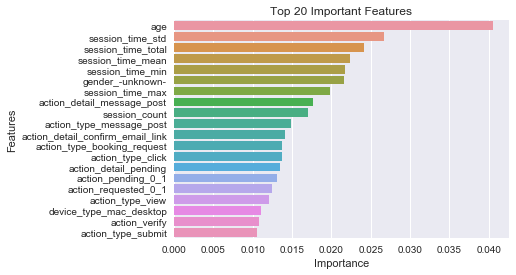

In [199]:
# Plot Feature importance
sns.barplot(x='importance', y=top_20_feats.index, data=top_20_feats)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Top 20 Important Features')

plt.show()

### Time From Account Creation to Booking

In [70]:
reserved.elapsed_time = pd.to_numeric(reserved.elapsed_time.map(lambda x: str(x)[:-24]))

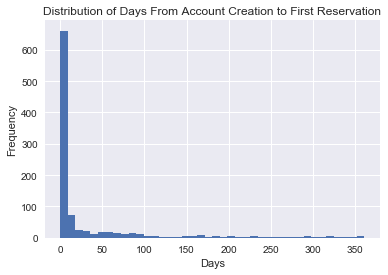

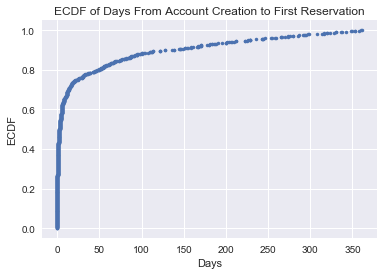

In [71]:
# Create histogram plot
plt.hist(reserved.elapsed_time, bins = 40)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Distribution of Days From Account Creation to First Reservation')

plt.show()

# Create ECDF plot
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x_vers, y_vers = ecdf(reserved.elapsed_time)
# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.xlabel('Days')
plt.ylabel('ECDF')
plt.title('ECDF of Days From Account Creation to First Reservation')

plt.show()

Most users will create their account and make a resevation in the same day.

### Age

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


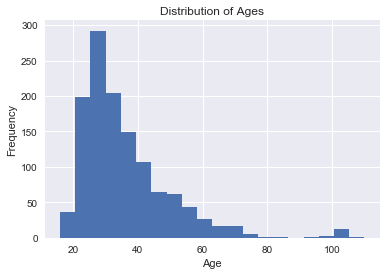

In [72]:
# Discovered invalid ages above 200
# Replaced invalid ages is NaN
eda_data.age[eda_data.age > 110] = np.NaN

# Create histogram plot
plt.hist(eda_data.age[~np.isnan(eda_data.age)], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


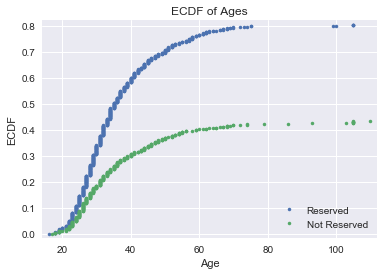

In [230]:
reserved.age[reserved.age > 110] = np.NaN
not_reserved.age[not_reserved.age > 110] = np.NaN

# Compute ECDFs
x_r, y_r = ecdf(reserved.age)
x_nr, y_nr = ecdf(not_reserved.age)

# # Plot all ECDFs on the same plot
plt.plot(x_r, y_r, marker='.', linestyle='none')
plt.plot(x_nr, y_nr, marker='.', linestyle='none')

# # Make nice margins
plt.margins(0.02)

# # Annotate the plot
plt.legend(('Reserved', 'Not Reserved'), loc='lower right')
plt.xlabel('Age')
plt.ylabel('ECDF')
plt.title('ECDF of Ages')

plt.show()

### Gender

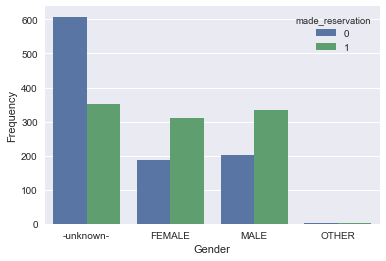

In [31]:
sns.countplot(x='gender', hue='made_reservation', data=eda_data)
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of Genders')

plt.show()

### Signup Method

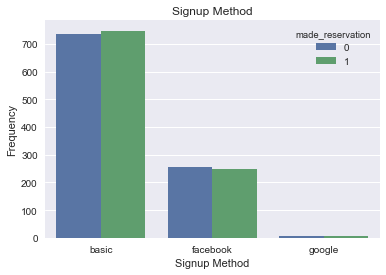

In [193]:
sns.countplot(x='signup_method', hue='made_reservation', data=eda_data)
plt.ylabel('Frequency')
plt.xlabel('Signup Method')
plt.title('Signup Method')

plt.show()

### Session Times

In [ ]:
sesh = pd.read_csv('data/Original/sessions.csv', index_col = 0)
times = pd.DataFrame(sesh.secs_elapsed)

In [184]:
res = pd.DataFrame(eda_data.made_reservation)

df3 = pd.merge(res, times, left_index=True, right_index=True)
df3 = pd.DataFrame(df3.secs_elapsed[~np.isnan(df3.secs_elapsed)])

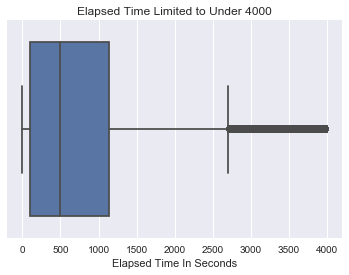

In [195]:
sns.boxplot(x="secs_elapsed", data=df3[df3.secs_elapsed < 4000])
plt.xlabel('Elapsed Time In Seconds')
plt.title('Elapsed Time Limited to Under 4000')

plt.show()

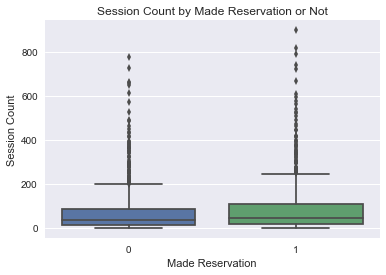

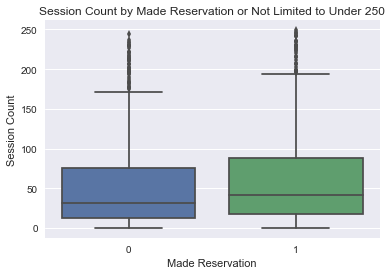

In [206]:
sns.boxplot(x="made_reservation", y="session_count", data=eda_data)
plt.ylabel('Session Count')
plt.xlabel('Made Reservation')
plt.title('Session Count by Made Reservation or Not')
plt.show()

sns.boxplot(x="made_reservation", y="session_count", data=eda_data[eda_data.session_count < 250 ])
plt.ylabel('Session Count')
plt.xlabel('Made Reservation')
plt.title('Session Count by Made Reservation or Not: Limited to Under 250')
plt.show()

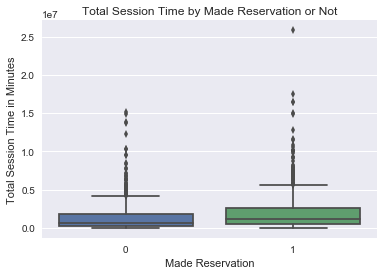

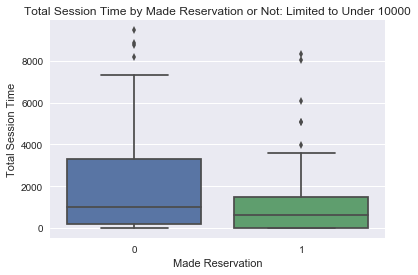

In [217]:
# min_total = eda_data.session_time_total / 60 
sns.boxplot(x="made_reservation", y='session_time_total', data=eda_data)
plt.ylabel('Total Session Time in Minutes')
plt.xlabel('Made Reservation')
plt.title('Total Session Time by Made Reservation or Not')
plt.show()

sns.boxplot(x="made_reservation", y='session_time_total', data=eda_data[eda_data.session_time_total < 10000])
plt.ylabel('Total Session Time')
plt.xlabel('Made Reservation')
plt.title('Total Session Time by Made Reservation or Not: Limited to Under 10000')
plt.show()

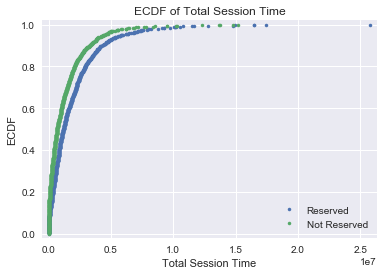

In [231]:
# Compute ECDFs
x_r, y_r = ecdf(reserved.session_time_total)
x_nr, y_nr = ecdf(not_reserved.session_time_total)

# # Plot all ECDFs on the same plot
plt.plot(x_r, y_r, marker='.', linestyle='none')
plt.plot(x_nr, y_nr, marker='.', linestyle='none')

# # Make nice margins
plt.margins(0.02)

# # Annotate the plot
plt.legend(('Reserved', 'Not Reserved'), loc='lower right')
plt.xlabel('Total Session Time')
plt.ylabel('ECDF')
plt.title('ECDF of Total Session Time')

plt.show()

In [228]:
# the probility of a reservtion being made after x time is 